In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
import os
import shutil

In [2]:
inputs='/groups/sbinlab/panf/SKEMPIv2_benchmark/benchmark_inputs/raw_PDBs/'

## Get PDBs: rename and sort

In [3]:
# Load dataset and get list of mutations in cases and unique PDB list 
# (for downloading PDBs from PDB website)

skempi2 = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi2_final.csv')
# FFRF = skempi2['Mutations'].str.split(';',expand=False)
# PDB_IDs = skempi2['PDBFileID'].unique()

In [5]:
# CREATE SEPARATE FOLDER FOR EACH UNIQUE PDB_ID IN THE DATASET

# os.chdir('/Users/jhn949/Documents/PhD project/PPI project/Flex ddG/Benchmark data structure')
# for PDB_ID in PDB_IDs:
#     os.mkdir(PDB_ID)

In [6]:
# RENAME .ENT FILES INTO .PDB (AND MAKE IT UPPERCASE)

# os.chdir('/Users/jhn949/Documents/PhD project/PPI project/Flex ddG/Benchmark data structure/PDB_FILES')
# for file in os.listdir():
#     if not file.endswith('.DS_Store'):
#         pdb_file = str(file[0:4]).upper() + '.pdb'
# #        pdb_file = str(file[3:7]) + '.pdb'
#         os.rename(file, pdb_file)

In [7]:
# SORT PDB FILES INTO THEIR FOLDERS

# os.chdir('/Users/jhn949/Documents/PhD project/PPI project/Flex ddG/Benchmark data structure')
# for folder in os.listdir():
#     if not folder.endswith(('.DS_Store', 'FILES')):
#         path_current = os.getcwd() + '/PDB_FILES' + '/' + folder + '.pdb'
#         path_new = os.getcwd() + '/' + folder + '/' + folder + '.pdb'
#         shutil.move(path_current, path_new)

## Get resfiles

#### Example of resfile:

B T58D;A N92A;B T28D;B S57V<br>

should become:<br>

NATAA<br>
start<br>
58 B PIKAA D<br>
92 A PIKAA A<br>
28 B PIKAA D<br>
57 B PIKAA V<br>

In [ ]:
# Get resfiles, which contain mutation position, chain, type and substitution aa 

for index, row in skempi2.iterrows():
    PBD_folder_path = os.path.join(inputs, row.PDB_ID)
    case_name = row.case_ID
    r = open(os.path.join(PBD_folder_path, case_name), "w+")
    
    r.write("NATAA \r\nstart \r\n")
    for mut in row['Mutation(s)_PDB'].split(','):
        chain = mut[1]
        position = mut[2:-1]
        aa = mut[-1]
        r.write(position + ' ' + chain + ' ' + 'PIKAA' + ' ' + aa + '\r\n')
    r.close()
    
    chains = row['RChains']
    resfile_name = case_name + '_' + chains + ".resfile"
    os.rename(os.path.join(PBD_folder_path, case_name), os.path.join(PBD_folder_path, resfile_name))

In [56]:
# os.chdir(inputs)
# for folder in os.listdir():
#     if not folder.endswith(('.DS_Store', 'FILES')):
#         os.chdir(folder)
#         for file in os.listdir():
#             if file.endswith('.resfile'):
#                 l_chains = Chains.loc[Chains.case_name==folder, 'LChains'].values[0]
#                 l_chains_sep = l_chains.split(';')
#                 str_chains = ''
#                 for c in l_chains_sep:
#                     str_chains = str_chains + c
#                 new_name = folder + '_' + str_chains + ".resfile"
#                 os.rename(file, new_name)
#         os.chdir(inputs)

In [75]:
# os.chdir(main)
# for folder in os.listdir():
#     if not folder.endswith(('.DS_Store', 'FILES')):
#         os.chdir(folder)
#         for file in os.listdir():
#             if file.endswith('.resfile'):
#                 resfs = file.split('_')
#                 case = resfs[0] +'_'+ resfs[1]
#                 l_chains = Chains.loc[Chains.case_name==case, 'LChains'].values[0]
#                 l_chains_sep = l_chains.split(';')
#                 str_chains = ''
#                 for c in l_chains_sep:
#                     str_chains = str_chains + c
#                 new_name = case + '_' + str_chains + ".resfile"
#                 os.rename(file, new_name)
#         os.chdir(main)

### Remove resfiles from PDB folders

In [4]:
os.chdir('/groups/sbinlab/panf/Sandbox/inputs/main')
for folder in os.listdir():
    os.chdir('/groups/sbinlab/panf/Sandbox/inputs/main')
    if not folder.endswith(('.ipynb_checkpoints')):
        os.chdir(folder)
        os.listdir()
        for rfile in os.listdir():
            if not (rfile.endswith('.pdb'))|(rfile.endswith('.ipynb_checkpoints')):
                os.remove(rfile)

## PDB files cleaning

In [15]:
os.chdir(inputs)
for folder in os.listdir():
    if not folder.endswith(('.DS_Store', 'FILES', 'main')):
        os.chdir(folder)
        PDB_case = folder.split('_')[1]
        for file in os.listdir():
            if file.endswith('.pdb'):
                PDB_file = (file.split('.')[0]).split('_')[1]
                if PDB_file != PDB_case:
                    print(folder)
    os.chdir(inputs)

In [16]:
inputs

'/groups/sbinlab/panf/SKEMPIv2_benchmark/benchmark_inputs/raw_PDBs/'

In [17]:
skempi2

,index,case_ID,PDB_ID,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),...,Method,SKEMPI version,no_proper_value,multiple_measurements,dG_bind_WT,dG_bind_MUT,ddG_bind,LChains,RChains,Chains
0,0,0_1CSE,1CSE,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,...,IASP,1,Regular,False,-16.076881,-13.827923,2.248958,E,I,EI
1,1,1_1CSE,1CSE,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,...,IASP,1,Regular,False,-16.076881,-14.904587,1.172294,E,I,EI
2,2,2_1CSE,1CSE,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,...,IASP,1,Regular,False,-16.076881,-9.405234,6.671647,E,I,EI
3,3,3_1CSE,1CSE,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,...,IASP,1,Regular,False,-16.076881,-13.135730,2.941151,E,I,EI
4,4,4_1CSE,1CSE,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,...,IASP,1,Regular,False,-16.076881,-11.726206,4.350675,E,I,EI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,6162,6162_3QIB,3QIB,3QIB_ABP_CD,KP9R,KP8R,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",2.4E-04,...,SPR,2,Regular,False,-7.171834,-4.935801,2.236033,ABP,CD,ABPCD
6163,6163,6163_3QIB,3QIB,3QIB_ABP_CD,TP12A,TP11A,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",>1.1E-03,...,SPR,2,Both WT and MUT are out of range,False,-7.171834,-4.034240,3.137594,ABP,CD,ABPCD
6164,6164,6164_3QIB,3QIB,3QIB_ABP_CD,TP12S,TP11S,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",3.38E-05,...,SPR,2,Regular,False,-7.171834,-6.096592,1.075241,ABP,CD,ABPCD
6165,6165,6165_3QIB,3QIB,3QIB_ABP_CD,TP12N,TP11N,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",4.34E-05,...,SPR,2,Regular,False,-7.171834,-5.948547,1.223287,ABP,CD,ABPCD


In [23]:
for chains in skempi2.loc[skempi2.PDB_ID=='2C5D', 'Chains'].unique():
    print(chains)

AC
ABCD


In [24]:
if 'A' in 'ABC':
    print('yes')

yes


In [30]:
#For initial pipeline
for folder in os.listdir(inputs):
    if not folder.endswith(('.ipynb_checkpoints', '._PDBs')):
        orig_folder = os.path.join(inputs, folder)
        for file in os.listdir(orig_folder):
            if file.endswith('.pdb'):
                pdb_name = file
                pdb_path = os.path.join(orig_folder, file)
                PDB_ID = pdb_name.split('.')[0]
                chains_sets = skempi2.loc[skempi2.PDB_ID==PDB_ID, 'Chains'].unique()
                old_pdb = open(pdb_path, 'r')
                lines = old_pdb.readlines()
                old_pdb.close()  
                for chains in chains_sets:
                    cleaned_pdb_name = f'Cleaned_{chains}_{pdb_name}'
                    cleaned_pdb_path = os.path.join(orig_folder, cleaned_pdb_name)
                    cleaned_pdb = open(cleaned_pdb_path, 'w+')
                    for line in lines:
                        if line.startswith('ATOM'):
                            if line[21] in chains:
                                cleaned_pdb.write(line)
                    cleaned_pdb.close()       

In [ ]:
int(re.search(r'\d+', line[22:26].group())

In [ ]:
if (line[17:20] != raa_prev)|(line[22:26] != rn_pres):
    chain_num = line[21] + line[22:26].strip(' ')
    pos_chain[chain_num] = pos_add
    raa_prev = line[17:20]
    rn_pres = line[22:26]
    pos_add += 1

In [7]:
# Trying to renumber residues so that they start from 1 AND all weird numbers are removed

# test_path = os.path.join(inputs, "main/1JRH")
# os.chdir(test_path)
# for file in os.listdir(): 
#             if file.endswith('.pdb'):
#                 pdb = file
#                 old_pdb = open(pdb, 'r')
#                 # cleaned_pdb_name = 'Cleaned_' + pdb
#                 # cleaned_pdb = open(cleaned_pdb_name, 'w+')
#                 lines = old_pdb.readlines()
#                 for line in lines:
#                     if line.startswith('ATOM'):
#                         chain = line[21]
#                         resstring = line[22:27]
#                         if lastresstring == "" or resstring != lastresstring :
#                                 if lastresstring != "" : 
#                                     resnum += 1
#                                 resnum = resnum
#                                 lastresstring = resstring
#                             newresstring = str(resnum) + " "
#                             if len(newresstring) == 2: 
#                                 newresstring = "   " + newresstring
#                             elif len(newresstring) == 3: 
#                                 newresstring = "  " + newresstring
#                             elif len(newresstring) == 4: 
#                                 newresstring = " " + newresstring                        
                        
#                         new_line = 'ATOM  ' + ' '*(5-len(str(atom_num))) + str(atom_num) +line[11:22] + newresstring + line[27:]
                        
                        
                        
#                         try:
#                             int(line.split()[5])
                            
#                             #cleaned_pdb.write(line)
#                         except:
#                             print(line.split()[5])
#                             #''.join(filter(str.isdigit, ))
                            
#                 #     if line.startswith('ATOM'):
#                 #             cleaned_pdb.write(line)
#                 # cleaned_pdb.close()


### Remove 'cleaned' PDBs from folders

In [29]:
for folder in os.listdir(inputs):
    if not folder.endswith(('.DS_Store', '._PDBs')):
        for file in os.listdir(os.path.join(inputs, folder)):
            if file.startswith('Cleaned'):
                os.remove(os.path.join(inputs, folder, file))

### Remove wrong resfiles from folders

In [82]:
os.chdir(main)
for folder in os.listdir():
    if not folder.endswith('.DS_Store'):
        os.chdir(folder)
        for file in os.listdir():
            if file.endswith('.resfile') & (len(file.split('_')) < 3):
                os.remove(file)
    os.chdir(main)

## Creating in folder 'input' all required folders with symbolic links to PDBs and resfiles

In [54]:
inputs

'/groups/sbinlab/panf/SKEMPIv2_benchmark/benchmark_inputs/raw_PDBs/'

In [55]:
flex_ddg_run_dir = '/groups/sbinlab/panf/SKEMPIv2_benchmark/benchmark_inputs/flex_ddg'

In [57]:
for folder in os.listdir(inputs):
    if not folder.endswith(('.ipynb_checkpoints', '._PDBs')):
        PDB_ID = folder
        for file in os.listdir(os.path.join(inputs, PDB_ID)):
            if file.endswith('.resfile'):
                index = file.split('_')[0]
                resfile = file
                chains = skempi2.loc[skempi2['case_ID']==(index + '_' + PDB_ID)]['Chains'].values[0]
                src = os.path.join(inputs, folder)
                dst = os.path.join(flex_ddg_run_dir, (index + '_' + folder))
                os.makedirs(dst, exist_ok=True)
                os.symlink(os.path.join(src, resfile), os.path.join(dst, resfile))
                os.symlink(os.path.join(src, f'Cleaned_{chains}_{PDB_ID}.pdb'), os.path.join(dst, f'Cleaned_{chains}_{PDB_ID}.pdb'))

## Reverse engineering of mutations

In [2]:
case_id_list = list()
muts_list = list()
rchains = list()

inputs='/groups/sbinlab/panf/SKEMPIv2_benchmark/benchmark_inputs/flex_ddg/'
for case in os.listdir(inputs):
    for file in os.listdir(os.path.join(inputs, case)):
        if file.endswith('.resfile'):
            rchains.append('_'.join(file.split('.')[0].split('_')[1:]))
            case_id_list.append(case)
            r = open(os.path.join(inputs, case, file), "r")
            lines = r.readlines()
            muts = list()
            for l in lines:
                if not l.startswith(('NATAA', 'start')):
                    mut_items = l.split(' ')
                    pos = mut_items[0]
                    chain = mut_items[1]
                    sub = mut_items[-1].rstrip('\r\n')
                    mutation = chain + pos + sub
                    muts.append(mutation)
            mut_full = ','.join(muts)
            muts_list.append(mut_full)

In [29]:
flex_ddg = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/Flex_ddG/analysis_output_SKEMPI2/output_classic-results.csv')

In [3]:
flex_ddg = pd.read_csv('/groups/sbinlab/panf/analysis_output_SKEMPI2_021025/output_classic-results.csv')

In [6]:
flex_ddg_stds = pd.read_csv('/groups/sbinlab/panf/analysis_output_SKEMPI2_021025/output_classic-struct_scores_results.csv')

In [7]:
flex_ddg_stds

,Unnamed: 0,case_name,backrub_steps,struct_num,score_function_name,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,...,hbond_lr_bb,hbond_sc,hbond_sr_bb,omega,p_aa_pp,pro_close,rama,ref,total_score,yhh_planarity
0,0,4823_3SE4,5,1,fa_talaris2014,1.178613e-12,-0.175868,0.0,0.096756,1.438849e-13,...,1.331557e-11,-0.002937,1.107878e-10,0.0,0.0,-1.806111e-12,0.0,0.0,0.258184,0.0
1,1,4823_3SE4,5,2,fa_talaris2014,2.700062e-13,0.047184,0.0,0.148651,-1.918465e-13,...,-2.148681e-11,-0.082100,5.934453e-11,0.0,0.0,-4.455547e-12,0.0,0.0,0.098432,0.0
2,2,4823_3SE4,5,3,fa_talaris2014,-3.961276e-13,1.139334,0.0,-0.464506,-1.154632e-14,...,1.097078e-11,-0.050212,-5.191225e-11,0.0,0.0,-4.698464e-13,0.0,0.0,-0.004833,0.0
3,3,4823_3SE4,5,4,fa_talaris2014,1.131539e-12,-0.058701,0.0,-0.310581,8.348877e-14,...,-1.193712e-11,-0.514135,-9.876544e-12,0.0,0.0,3.623768e-13,0.0,0.0,-0.785080,0.0
4,4,4823_3SE4,5,5,fa_talaris2014,-2.334133e-12,-0.332417,0.0,-0.047723,-1.687539e-14,...,3.345235e-11,0.025343,-1.452918e-10,0.0,0.0,-1.835865e-12,0.0,0.0,-0.152099,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60379,5,3111_3QDJ,5,6,fa_talaris2014,4.686918e-12,-2.798022,0.0,0.453219,8.526513e-14,...,6.616574e-11,-0.245540,2.092264e-10,0.0,0.0,5.368150e-12,0.0,0.0,6.535017,0.0
60380,6,3111_3QDJ,5,7,fa_talaris2014,4.637180e-12,-2.108269,0.0,-0.394782,1.456613e-13,...,-2.126512e-10,-0.076222,-2.849845e-10,0.0,0.0,7.794654e-12,0.0,0.0,6.381676,0.0
60381,7,3111_3QDJ,5,8,fa_talaris2014,-7.323031e-12,-2.457423,0.0,1.363490,1.065814e-13,...,2.961542e-10,0.071783,2.750511e-10,0.0,0.0,-4.494183e-13,0.0,0.0,8.644629,0.0
60382,8,3111_3QDJ,5,9,fa_talaris2014,1.587175e-12,-1.826362,0.0,1.075020,-1.953993e-14,...,2.961542e-11,0.078933,4.847323e-11,0.0,0.0,1.031175e-12,0.0,0.0,7.330641,0.0


In [8]:
flex_ddg_stds.loc[flex_ddg_stds['case_name']=='4823_3SE4']

,Unnamed: 0,case_name,backrub_steps,struct_num,score_function_name,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,...,hbond_lr_bb,hbond_sc,hbond_sr_bb,omega,p_aa_pp,pro_close,rama,ref,total_score,yhh_planarity
0,0,4823_3SE4,5,1,fa_talaris2014,1.178613e-12,-0.175868,0.0,0.096756,1.438849e-13,...,1.331557e-11,-0.002937,1.107878e-10,0.0,0.0,-1.806111e-12,0.0,0.0,0.258184,0.0
1,1,4823_3SE4,5,2,fa_talaris2014,2.700062e-13,0.047184,0.0,0.148651,-1.918465e-13,...,-2.148681e-11,-0.082100,5.934453e-11,0.0,0.0,-4.455547e-12,0.0,0.0,0.098432,0.0
2,2,4823_3SE4,5,3,fa_talaris2014,-3.961276e-13,1.139334,0.0,-0.464506,-1.154632e-14,...,1.097078e-11,-0.050212,-5.191225e-11,0.0,0.0,-4.698464e-13,0.0,0.0,-0.004833,0.0
3,3,4823_3SE4,5,4,fa_talaris2014,1.131539e-12,-0.058701,0.0,-0.310581,8.348877e-14,...,-1.193712e-11,-0.514135,-9.876544e-12,0.0,0.0,3.623768e-13,0.0,0.0,-0.785080,0.0
4,4,4823_3SE4,5,5,fa_talaris2014,-2.334133e-12,-0.332417,0.0,-0.047723,-1.687539e-14,...,3.345235e-11,0.025343,-1.452918e-10,0.0,0.0,-1.835865e-12,0.0,0.0,-0.152099,0.0
5,5,4823_3SE4,5,6,fa_talaris2014,-8.242296e-13,-0.044584,0.0,0.043454,-1.421085e-13,...,2.242473e-11,-0.008007,1.788720e-10,0.0,0.0,1.374012e-12,0.0,0.0,0.091222,0.0
6,6,4823_3SE4,5,7,fa_talaris2014,-2.815526e-12,0.182606,0.0,0.079829,-4.796163e-14,...,-1.845990e-11,-0.064895,6.799894e-11,0.0,0.0,-2.546852e-12,0.0,0.0,-0.035207,0.0
7,7,4823_3SE4,5,8,fa_talaris2014,2.536638e-12,0.402068,0.0,0.072759,1.509903e-14,...,3.694822e-13,0.125372,-2.889067e-11,0.0,0.0,1.385558e-12,0.0,0.0,0.268258,0.0
8,8,4823_3SE4,5,9,fa_talaris2014,-1.036504e-12,0.254504,0.0,0.521750,-1.421085e-14,...,5.695711e-11,0.107863,4.978489e-10,0.0,0.0,6.581402e-13,0.0,0.0,1.635908,0.0
9,9,4823_3SE4,5,10,fa_talaris2014,-6.314949e-13,-0.037038,0.0,0.000247,-1.447731e-13,...,-1.469402e-11,-0.035811,1.014229e-10,0.0,0.0,-2.452261e-12,0.0,0.0,-0.099851,0.0


In [35]:
xy = pd.merge(flex_ddg_reg, flex_ddg_stds[['case_name', 'struct_num', 'total_score']].groupby('case_name').std().rename(columns={'total_score':'std'}), left_on=['case_ID'], right_on=['case_name'])

In [33]:
flex_ddg_stds[['case_name', 'struct_num', 'total_score']].groupby('case_name').std().rename(columns={'total_score':'std'})

,struct_num,std
case_name,,
0_1CSE,3.02765,0.675763
1000_1EAW,3.02765,0.564693
1001_1EAW,3.02765,0.949344
1002_1EAW,3.02765,0.098732
1003_1EAW,3.02765,0.403123
...,...,...
997_1EAW,3.02765,0.640328
998_1EAW,3.02765,1.362024
999_1EAW,3.02765,0.352156


In [11]:
flex_ddg_stds[['case_name', 'struct_num', 'total_score']].groupby('case_name').mean()

,struct_num,total_score
case_name,,
0_1CSE,5.5,3.319732
1000_1EAW,5.5,-0.185720
1001_1EAW,5.5,-0.089047
1002_1EAW,5.5,-0.035234
1003_1EAW,5.5,0.046800
...,...,...
997_1EAW,5.5,-0.215925
998_1EAW,5.5,0.859496
999_1EAW,5.5,0.103512


In [36]:
flex_ddg_reg = flex_ddg.loc[(flex_ddg['score_function_name']=='fa_talaris2014')&(flex_ddg['scored_state']=='ddG')][['case_name', 'total_score']]
flex_ddg_reg.rename(columns={"total_score": "flex_ddg", 'case_name': 'case_ID'}, inplace=True)

In [37]:
flex_ddg_reg=pd.merge(flex_ddg_reg, flex_ddg_stds[['case_name', 'struct_num', 'total_score']].groupby('case_name').std().rename(columns={'total_score':'std'}), left_on=['case_ID'], right_on=['case_name'])

In [38]:
flex_ddg_gam = flex_ddg.loc[(flex_ddg['score_function_name']=='fa_talaris2014-gam')&(flex_ddg['scored_state']=='ddG')][['case_name', 'total_score']]
flex_ddg_gam.rename(columns={"total_score": "flex_ddg_gam", 'case_name': 'case_ID'}, inplace=True)

In [39]:
skempi2_6167_r = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/skempi2_final_6167.csv')

In [40]:
mrgd_reg = pd.merge(skempi2_6167_r, flex_ddg_reg, on=['case_ID'], how='left')

In [41]:
mrgd_gam = pd.merge(skempi2_6167_r, flex_ddg_gam, on=['case_ID'], how='left')

In [42]:
mrgd_both = pd.merge(mrgd_reg, flex_ddg_gam, on=['case_ID'], how='left')

In [81]:
mrgd_reg.to_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/flex_ddg_reg_skempi2_new.csv', index=False)

In [82]:
mrgd_gam.to_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/flex_ddg_gam_skempi2_new.csv', index=False)

In [43]:
mrgd_both.to_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/flex_ddg_both_skempi2_std.csv', index=False)

In [44]:
mrgd_both

,index,case_ID,PDB_ID,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),...,dG_bind_WT,dG_bind_MUT,ddG_bind,LChains,RChains,Chains,flex_ddg,struct_num,std,flex_ddg_gam
0,0,0_1CSE,1CSE,1CSE_E_I,LI45G,LI38G,COR,Pr/PI,Pr/PI,5.26E-11,...,-16.076881,-13.827923,2.248958,E,I,EI,3.31973,3.027650,0.675763,3.404005
1,1,1_1CSE,1CSE,1CSE_E_I,LI45S,LI38S,COR,Pr/PI,Pr/PI,8.33E-12,...,-16.076881,-14.904587,1.172294,E,I,EI,2.32569,3.027650,0.952245,2.188706
2,2,2_1CSE,1CSE,1CSE_E_I,LI45P,LI38P,COR,Pr/PI,Pr/PI,1.02E-07,...,-16.076881,-9.405234,6.671647,E,I,EI,3.13394,2.738613,0.965522,4.093389
3,3,3_1CSE,1CSE,1CSE_E_I,LI45I,LI38I,COR,Pr/PI,Pr/PI,1.72E-10,...,-16.076881,-13.135730,2.941151,E,I,EI,0.01419,3.027650,0.636357,0.015604
4,4,4_1CSE,1CSE,1CSE_E_I,LI45D,LI38D,COR,Pr/PI,Pr/PI,1.92E-09,...,-16.076881,-11.726206,4.350675,E,I,EI,2.17061,3.027650,0.593395,1.413182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,6162,6162_3QIB,3QIB,3QIB_ABP_CD,KP9R,KP8R,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",2.4E-04,...,-7.171834,-4.935801,2.236033,ABP,CD,ABPCD,-0.20540,3.027650,1.665971,-0.940577
6163,6163,6163_3QIB,3QIB,3QIB_ABP_CD,TP12A,TP11A,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",>1.1E-03,...,-7.171834,-4.034240,3.137594,ABP,CD,ABPCD,1.13528,3.027650,0.531133,1.240621
6164,6164,6164_3QIB,3QIB,3QIB_ABP_CD,TP12S,TP11S,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",3.38E-05,...,-7.171834,-6.096592,1.075241,ABP,CD,ABPCD,0.42342,3.027650,1.028612,0.533528
6165,6165,6165_3QIB,3QIB,3QIB_ABP_CD,TP12N,TP11N,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",4.34E-05,...,-7.171834,-5.948547,1.223287,ABP,CD,ABPCD,0.91441,3.027650,1.361566,0.458914


In [38]:
mrgd = pd.merge(skempi2_6167_r, flex_ddg_reg, left_on=['case_ID'], right_on=['case_name'], how='left')
#mrgd.loc[mrgd['mean_ddG']>15, 'mean_ddG'] = 15
mrgd['N_mut'] = mrgd['Mutation(s)_PDB'].str.split(',').str.len()
mrgd['N_mut'] = mrgd['N_mut'].apply(lambda x: '3+' if x >= 3 else x)
mrgd['N_mut'] = mrgd['N_mut'].apply(str)

van_der_waals_volumes = {'A': 1.00, 'C': 2.43,
                         'D': 2.78, 'E': 3.78,
                         'F': 5.89, 'G': 0.00,
                         'H': 4.66, 'I': 4.00,
                         'K': 4.77, 'L': 4.00,
                         'M': 4.43, 'N': 2.95,
                         'P': 2.72, 'Q': 3.95,
                         'R': 6.13, 'S': 1.60,
                         'T': 2.60, 'V': 3.00,
                         'W': 8.08, 'Y': 6.4}

stl_list = list()
for index, row in mrgd.iterrows():
    muts = row['Mutation(s)_PDB'].split(',')
    stl = True
    for mut in muts:
        wt = mut[0]
        sub = mut[-1]
        if van_der_waals_volumes[sub]<=van_der_waals_volumes[wt]:
           stl = False
    stl_list.append(stl)
mrgd['small-to-large'] = stl_list

mrgd_no_nan = mrgd.loc[(~mrgd['ddG_bind'].isna())&(~mrgd['total_score'].isna())].copy()



In [39]:
mrgd_reg.loc[mrgd_reg['total_score'].isna()]['case_ID'].tolist()

['6035_1KBH',
 '6036_1KBH',
 '6037_1KBH',
 '6038_1KBH',
 '6039_1KBH',
 '6040_1KBH',
 '6041_1KBH',
 '6042_1KBH',
 '6043_1KBH',
 '6044_1KBH',
 '6045_1KBH',
 '6046_1KBH',
 '6047_1KBH',
 '6048_1KBH',
 '6049_1KBH',
 '6050_1KBH',
 '6051_1KBH',
 '6052_1KBH',
 '6053_1KBH',
 '6054_1KBH',
 '6055_1KBH',
 '6056_1KBH',
 '6057_1KBH',
 '6058_1KBH',
 '6059_1KBH',
 '6060_1KBH',
 '6061_1KBH',
 '6062_1KBH',
 '6063_1KBH',
 '6064_1KBH',
 '6065_1KBH',
 '6066_1KBH',
 '6067_1KBH',
 '6068_1KBH',
 '6069_1KBH',
 '6070_1KBH',
 '6071_1KBH',
 '6072_1KBH',
 '6073_1KBH',
 '6074_1KBH',
 '6075_1KBH',
 '6076_1KBH',
 '6077_1KBH',
 '6078_1KBH',
 '6079_1KBH',
 '6080_1KBH',
 '6081_1KBH',
 '6082_1KBH',
 '6083_1KBH',
 '6084_1KBH',
 '6085_1KBH',
 '6086_1KBH',
 '6087_1KBH',
 '6088_1KBH',
 '6089_1KBH',
 '6090_1KBH',
 '6091_1KBH',
 '6092_1KBH',
 '6093_1KBH',
 '6094_1KBH',
 '6095_1KBH',
 '6096_1KBH',
 '6097_1KBH',
 '6098_1KBH',
 '6099_1KBH',
 '6100_1KBH',
 '6101_1KBH',
 '6102_1KBH',
 '6103_1KBH',
 '6104_1KBH',
 '6105_1KBH',
 '6106

In [22]:
mrgd_reg.loc[(mrgd_reg['total_score'].isna())&(~mrgd_reg['PDB_ID'].isin(['2FTL', '1Y48', '1Y3B', '1TM4', '1TO1', '1TM3', '1TM5']))]

,index,case_ID,PDB_ID,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),...,no_proper_value,multiple_measurements,dG_bind_WT,dG_bind_MUT,ddG_bind,LChains,RChains,Chains,case_name,total_score
360,360,360_2WPT,2WPT,2WPT_A_B,DA33L,DA30L,SUP,NaN,"2WPT_A_B,2VLP_A_B,2VLN_A_B,2VLQ_A_B,2VLO_A_B,1...",4.8E-11,...,False,False,-10.668373,-14.070252,-3.401879,A,B,AB,NaN,NaN
448,448,448_1EMV,1EMV,1EMV_A_B,TA38A,TA36A,RIM,NaN,"2VLP_A_B,2VLN_A_B,2VLQ_A_B,2VLO_A_B,1EMV_A_B,1...",7.4E-14,...,False,False,-18.804160,-17.904597,0.899564,A,B,AB,NaN,NaN
927,927,927_1HE8,1HE8,1HE8_A_B,"KA223V,KA251A","KA80V,KA108A","SUP,RIM",NaN,"1HE8_A_B,4G0N_A_B,3KUD_A_B,1LFD_A_B,1K8R_A_B,5...",>5E-05,...,True,False,-7.891330,-5.766313,2.125017,A,B,AB,NaN,NaN
6035,6035,6035_1KBH,1KBH,1KBH_A_B,"IB52V,YB98W","YB1172W,IB1126V","SUP,INT",NaN,1KBH_A_B,1.34E-07,...,False,False,-10.183780,-9.371608,0.812172,A,B,AB,NaN,NaN
6036,6036,6036_1KBH,1KBH,1KBH_A_B,"LB57A,YB98W","YB1172W,LB1131A","SUP,SUP",NaN,1KBH_A_B,4E-08,...,False,False,-10.183780,-10.087539,0.096242,A,B,AB,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6131,6131,6131_2KSO,2KSO,2KSO_A_B,"KA23E,KA62E,PA58A","KA10E,PA45A,KA49E","COR,RIM,RIM",NaN,2KSO_A_B,n.b,...,True,False,-7.205049,NaN,NaN,A,B,AB,NaN,NaN
6132,6132,6132_2KSO,2KSO,2KSO_A_B,RA56E,RA43E,RIM,NaN,2KSO_A_B,1.7E-06,...,False,False,-7.205049,-7.867132,-0.662083,A,B,AB,NaN,NaN
6133,6133,6133_2KSO,2KSO,2KSO_A_B,"HB47R,RA56E","RA43E,HB20R","RIM,RIM",NaN,2KSO_A_B,1.3E-06,...,False,False,-7.205049,-8.025994,-0.820945,A,B,AB,NaN,NaN
6134,6134,6134_2KSO,2KSO,2KSO_A_B,"HB47E,RA56E","RA43E,HB20E","RIM,RIM",NaN,2KSO_A_B,1.12E-05,...,False,False,-7.205049,-6.750691,0.454358,A,B,AB,NaN,NaN


In [13]:
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from math import sqrt

In [14]:
# Block of seaborn style settings
plt.rc('font', size=23) #controls default text size
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=18) #fontsize of the x tick labels
plt.rc('ytick', labelsize=18) #fontsize of the y tick labels
sns.set(style='whitegrid', color_codes=True, font='serif', font_scale=2)

plt.rc('font', size=23) #controls default text size
plt.rc('xtick', labelsize=25) #fontsize of the x tick labels
plt.rc('ytick', labelsize=25) #fontsize of the y tick labels

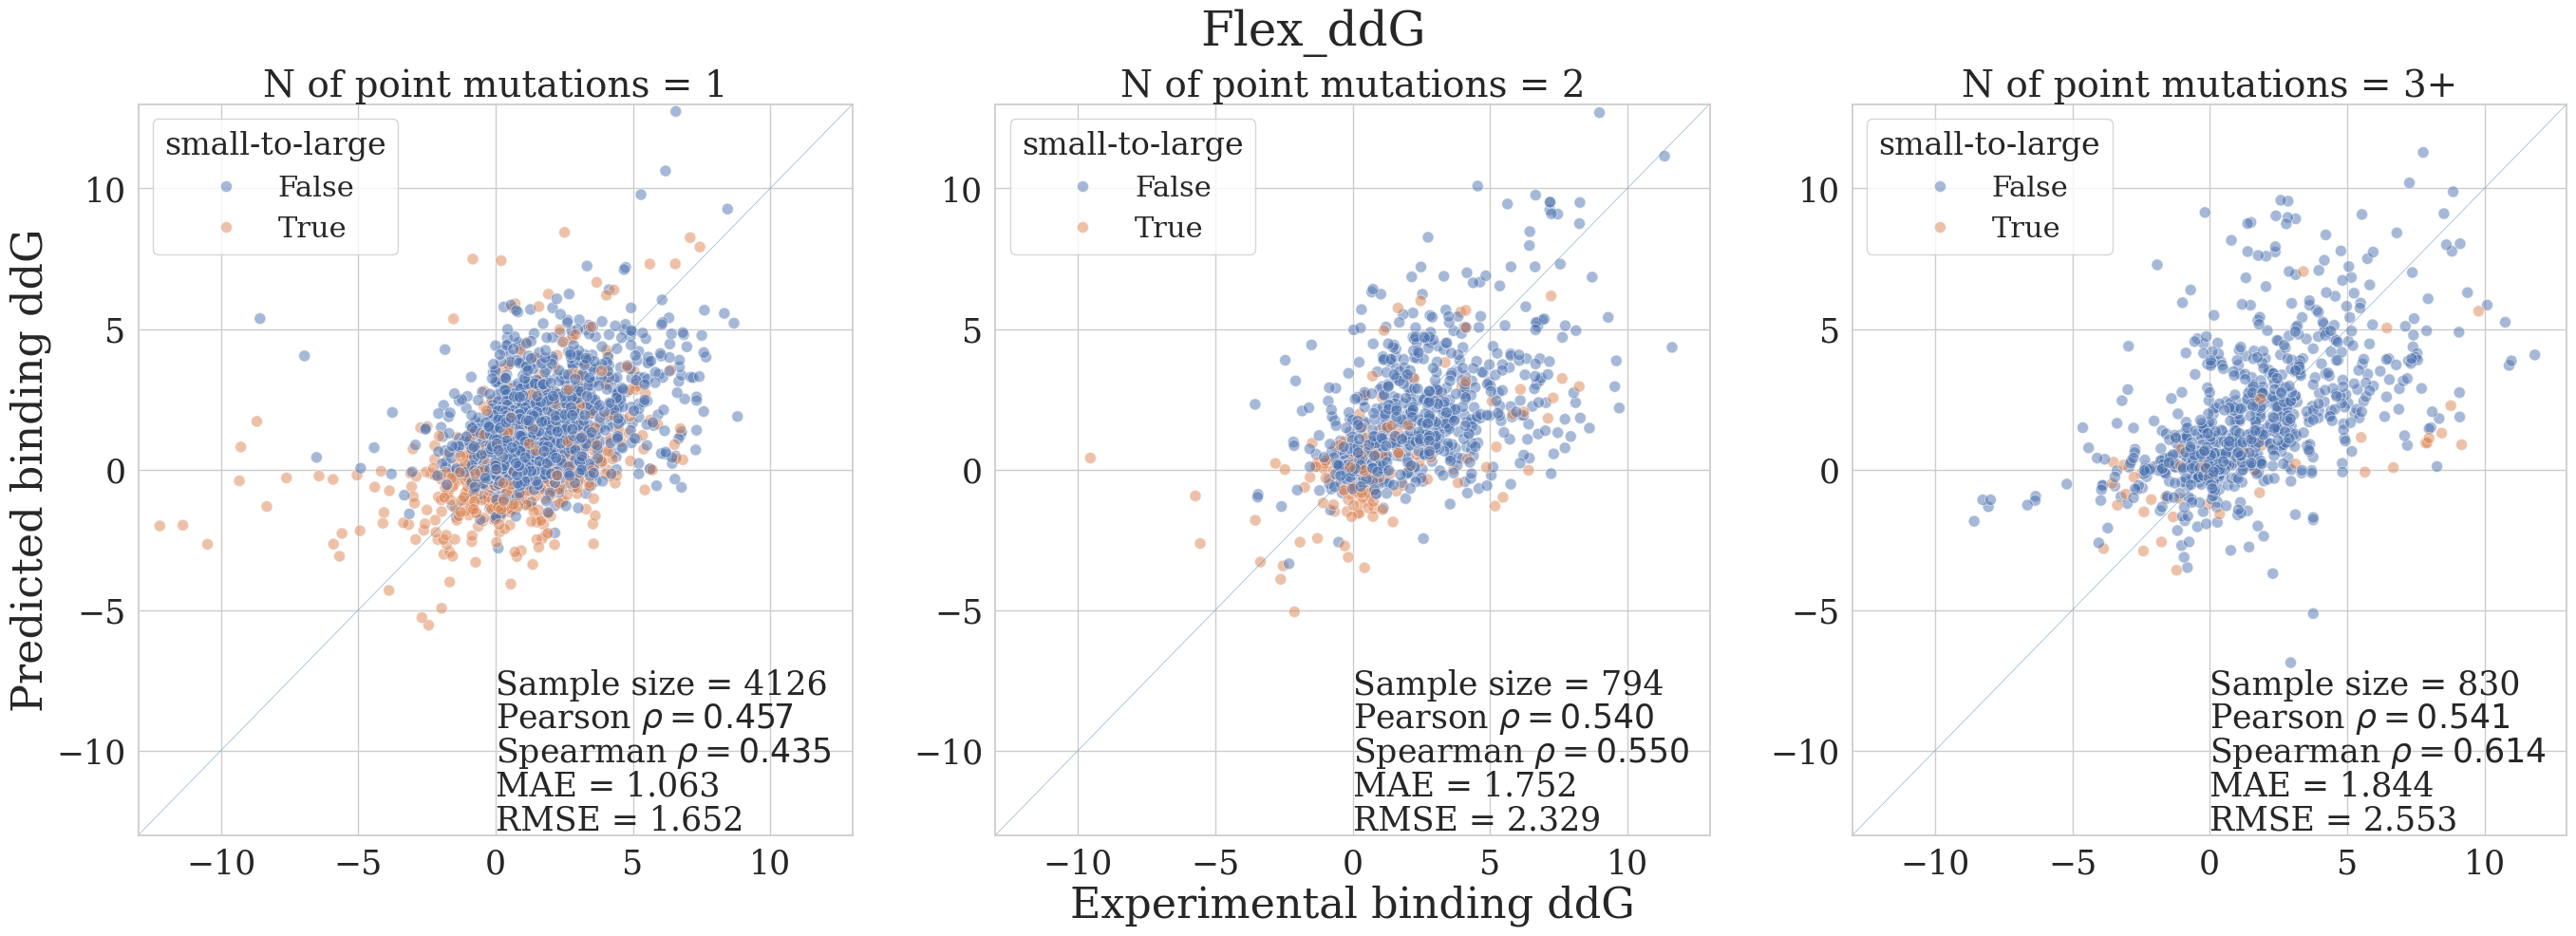

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(33, 10))  # 3 rows, 1 column
plt.setp(axs, xlim=(-13, 13), ylim=(-13, 13))
# Loop through the data and axes, and plot each scatter plot
for ax, N in zip(axs, mrgd_no_nan['N_mut'].unique()):
    subset = mrgd_no_nan.loc[mrgd_no_nan['N_mut']==N]
    sns.scatterplot(data=subset, x='ddG_bind',
                       y='total_score',
                       alpha=0.5, s=75,
                       hue='small-to-large', ax=ax)
    ax.plot([-15, 15], [-15, 15], color='steelblue', ls='-', lw=0.5, alpha=0.6)

    ax.annotate(f'Sample size = {len(subset)}', xy=(0, -8), fontsize = 25)
    r, p = stats.pearsonr(subset['ddG_bind'], subset['total_score'])
    ax.annotate(f'Pearson $\\rho = {r:.3f}$', xy=(0, -9.2), fontsize = 25)
    r, p = stats.spearmanr(subset['ddG_bind'], subset['total_score'])
    ax.annotate(f'Spearman $\\rho = {r:.3f}$', xy=(0, -10.4), fontsize = 25)
    error = mae(subset['ddG_bind'], subset['total_score'])
    ax.annotate(f'MAE = {error:.3f}', xy=(0, -11.6), fontsize = 25)
    rmse = sqrt(mean_squared_error(subset['ddG_bind'], subset['total_score']))
    ax.annotate(f'RMSE = {rmse:.3f}', xy=(0, -12.8), fontsize = 25)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_title(f'N of point mutations = {N}', fontsize = 28)
    
axs[1].set_xlabel("Experimental binding ddG", fontsize = 32)
axs[0].set_ylabel("Predicted binding ddG", fontsize = 32)
fig.suptitle('Flex_ddG', fontsize=36)

plt.savefig('Figures/flex_ddg_stl.pdf', format='pdf')

In [16]:
mrgd_no_nan['total_score'].min()

-32.04261

In [17]:
mrgd_no_nan['total_score'].max()

12.73611

In [18]:
mrgd_no_nan.loc[mrgd_no_nan['total_score']<-13]

,index,case_ID,PDB_ID,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),...,dG_bind_WT,dG_bind_MUT,ddG_bind,LChains,RChains,Chains,case_name,total_score,N_mut,small-to-large
5171,5171,5171_4OFY,4OFY,4OFY_A_D,MA56A,MA36A,SUP,NaN,4OFY_A_D,6.8E-07,...,-8.49382,-8.409747,0.084073,A,D,AD,5171_4OFY,-32.04261,1,False


In [49]:
flex_ddg_full = pd.read_csv('/groups/sbinlab/panf/SKEMPIv2_benchmark/Flex_ddG/analysis_output_SKEMPI2/-struct_scores_results.csv')

In [50]:
flex_ddg_full.loc[flex_ddg_full['case_name']=='5171_4OFY']

,Unnamed: 0,case_name,backrub_steps,struct_num,score_function_name,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,...,hbond_lr_bb,hbond_sc,hbond_sr_bb,omega,p_aa_pp,pro_close,rama,ref,total_score,yhh_planarity
1305,0,5171_4OFY,5,1,fa_talaris2014,-1.487699e-12,1.864203,0.0,0.479391,-5.240253e-14,...,0.016986,-0.211379,-1.328857e-10,0.0,0.0,-1.440625e-12,0.0,0.0,-0.343877,0.0
1306,1,5171_4OFY,5,2,fa_talaris2014,0.000000e+00,2.673257,0.0,-0.247367,-6.217249e-15,...,0.000000,-1.390668,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,-209.911494,0.0
1307,2,5171_4OFY,5,3,fa_talaris2014,0.000000e+00,0.264298,0.0,0.208907,0.000000e+00,...,0.000000,0.034515,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,0.233515,0.0
1308,3,5171_4OFY,5,4,fa_talaris2014,0.000000e+00,0.720600,0.0,0.144936,-4.440892e-15,...,0.000000,0.179030,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,-16.721411,0.0
1309,4,5171_4OFY,5,5,fa_talaris2014,0.000000e+00,2.174492,0.0,0.147432,1.776357e-15,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,-65.070228,0.0
1310,5,5171_4OFY,5,6,fa_talaris2014,0.000000e+00,2.176199,0.0,-0.039408,4.440892e-15,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,-19.337905,0.0
1311,6,5171_4OFY,5,7,fa_talaris2014,0.000000e+00,0.138961,0.0,-0.273305,0.000000e+00,...,0.000000,0.049003,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,-0.453791,0.0
1312,7,5171_4OFY,5,8,fa_talaris2014,0.000000e+00,0.920114,0.0,0.264462,-2.664535e-15,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,-1.013365,0.0
1313,8,5171_4OFY,5,9,fa_talaris2014,0.000000e+00,1.785459,0.0,-0.243183,8.881784e-16,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,-0.809361,0.0
1314,9,5171_4OFY,5,10,fa_talaris2014,0.000000e+00,3.645005,0.0,0.663420,4.440892e-15,...,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0,-6.998181,0.0


In [32]:
import shutil

In [34]:
mrgd_reg.loc[(mrgd_reg['total_score'].isna())&(~mrgd_reg['case_ID'].isin(list_abs))]

,index,case_ID,PDB_ID,#Pdb,Mutation(s)_PDB,Mutation(s)_cleaned,iMutation_Location(s),Hold_out_type,Hold_out_proteins,Affinity_mut (M),...,no_proper_value,multiple_measurements,dG_bind_WT,dG_bind_MUT,ddG_bind,LChains,RChains,Chains,case_name,total_score
12,12,12_1SBN,1SBN,1SBN_E_I,RI45K,RI38K,COR,Pr/PI,Pr/PI,3.2E-11,...,False,False,-14.000502,-14.310363,-0.309861,E,I,EI,NaN,NaN
13,13,13_1SIB,1SIB,1SIB_E_I,KI53R,KI46R,INT,Pr/PI,Pr/PI,3.2E-11,...,False,False,-13.579163,-14.310363,-0.731199,E,I,EI,NaN,NaN
15,15,15_1TM1,1TM1,1TM1_E_I,YI61G,YI42G,COR,Pr/PI,Pr/PI,5.4E-09,...,False,False,-15.952253,-11.273381,4.678872,E,I,EI,NaN,NaN
20,20,20_1TM1,1TM1,1TM1_E_I,TI58D,TI39D,COR,Pr/PI,Pr/PI,2.42E-11,...,False,False,-16.573944,-14.475810,2.098134,E,I,EI,NaN,NaN
24,24,24_1TM1,1TM1,1TM1_E_I,"EI60A,TI58D","TI39D,EI41A","COR,COR",Pr/PI,Pr/PI,2.5E-12,...,False,False,-16.573944,-15.820110,0.753833,E,I,EI,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,3387,3387_1AO7,1AO7,1AO7_ABC_DE,DA61A,DA61A,SUR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",1.67E-06,...,False,False,-8.257064,-7.877675,0.379389,ABC,DE,ABCDE,NaN,NaN
4250,4250,4250_2VN5,2VN5,2VN5_A_B,"SB47Q,TB48Q","SB42Q,TB43Q","SUR,SUR",NaN,2VN5_A_B,4.88E-09,...,False,False,-12.683858,-11.713656,0.970202,A,B,AB,NaN,NaN
5210,5210,5210_4P5T,4P5T,4P5T_CD_AB,KD-19A,KD7A,COR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",8.2E-05,...,False,False,-7.120307,-5.571762,1.548545,CD,AB,CDAB,NaN,NaN
5254,5254,5254_4P23,4P23,4P23_CD_AB,PD65A,PD74A,SUR,TCR/pMHC,"TCR/pMHC,1JCK_A_B",7E-06,...,False,False,-7.120307,-7.029021,0.091286,CD,AB,CDAB,NaN,NaN


In [35]:
mrgd_reg.loc[(mrgd_reg['total_score'].isna())&(~mrgd_reg['case_ID'].isin(list_abs))]['case_ID'].to_list()

['12_1SBN',
 '13_1SIB',
 '15_1TM1',
 '20_1TM1',
 '24_1TM1',
 '29_1Y3B',
 '32_1Y48',
 '38_1TM4',
 '39_1TM5',
 '40_1TM3',
 '43_1TO1',
 '46_1TM1',
 '53_2SIC',
 '57_2SIC',
 '62_1IAR',
 '72_1IAR',
 '76_1IAR',
 '83_1IAR',
 '87_1IAR',
 '133_1BRS',
 '151_1BRS',
 '160_1BRS',
 '169_1B2U',
 '177_1B3S',
 '198_1GCQ',
 '278_1DVF',
 '289_1DVF',
 '291_1DVF',
 '319_1VFB',
 '323_1VFB',
 '346_3BP8',
 '360_2WPT',
 '373_2WPT',
 '382_2WPT',
 '416_2WPT',
 '421_1EMV',
 '448_1EMV',
 '471_1KIP',
 '477_2PCC',
 '492_2PCB',
 '501_2JEL',
 '528_2JEL',
 '530_2JEL',
 '546_2O3B',
 '575_2J0T',
 '630_1N8O',
 '634_1MQ8',
 '693_1KTZ',
 '704_1REW',
 '732_2QJA',
 '779_1JTG',
 '790_1JTG',
 '822_1JTG',
 '840_1JTG',
 '869_1JTG',
 '871_1JTG',
 '880_1JTG',
 '898_1JTG',
 '915_1JTG',
 '927_1HE8',
 '934_1HE8',
 '939_1H9D',
 '1162_2FTL',
 '1163_2FTL',
 '1164_2FTL',
 '1165_2FTL',
 '1166_2FTL',
 '1167_2FTL',
 '1168_2FTL',
 '1169_2FTL',
 '1170_2FTL',
 '1171_2FTL',
 '1172_2FTL',
 '1173_2FTL',
 '1174_2FTL',
 '1175_2FTL',
 '1176_2FTL',
 '1

In [36]:
flex_ddg_scores = '/groups/sbinlab/panf/SKEMPIv2_benchmark/Flex_ddG/output_classic'
for case in mrgd_reg.loc[(mrgd_reg['total_score'].isna())&(~mrgd_reg['case_ID'].isin(list_abs))]['case_ID'].to_list():
    shutil.copytree(os.path.join(flex_ddg_scores, case), os.path.join(flex_ddg_scores, 'anal_script_test', case))

In [53]:
rosetta_output_file_name = 'rosetta.out'
output_database_name = 'ddG.db3'
trajectory_stride = 5

def rosetta_output_succeeded( potential_struct_dir ):
    path_to_rosetta_output = os.path.join( potential_struct_dir, rosetta_output_file_name )
    if not os.path.isfile(path_to_rosetta_output):
        print(path_to_rosetta_output, "is not file")
        return False

    db3_file = os.path.join( potential_struct_dir, output_database_name )
    if not os.path.isfile( db3_file ):
        print(db3_file, "is not file")
        return False

    success_line_found = False
    no_more_batches_line_found = False
    with open( path_to_rosetta_output, 'r' ) as f:
        for line in f:
            if line.startswith( 'protocols.jd2.JobDistributor' ) and 'reported success in' in line:
                success_line_found = True
                print('success_line_found', success_line_found, 'for', path_to_rosetta_output)
            if line.startswith( 'protocols.jd2.JobDistributor' ) and 'no more batches to process' in line:
                no_more_batches_line_found = True
                print('no_more_batches_line_found', no_more_batches_line_found, 'for', path_to_rosetta_output)

    return no_more_batches_line_found and success_line_found

def find_finished_jobs( output_folder ):
    return_dict = {}
    job_dirs = [ os.path.abspath(os.path.join(output_folder, d)) for d in os.listdir(output_folder) if os.path.isdir( os.path.join(output_folder, d) )]
    for job_dir in job_dirs:
        completed_struct_dirs = []
        for potential_struct_dir in sorted([ os.path.abspath(os.path.join(job_dir, d)) for d in os.listdir(job_dir) if os.path.isdir( os.path.join(job_dir, d) )]):
            print('rosetta_output_succeeded', rosetta_output_succeeded( potential_struct_dir ), 'for', potential_struct_dir)
            if rosetta_output_succeeded( potential_struct_dir ):
                completed_struct_dirs.append( potential_struct_dir )
                
        return_dict[job_dir] = completed_struct_dirs

    return return_dict

In [ ]:
find_finished_jobs( os.path.join(flex_ddg_scores, 'anal_script_test') )

In [57]:
for slurm in os.listdir('/groups/sbinlab/panf/SKEMPIv2_benchmark/Flex_ddG/slurms'):
    if not slurm.startswith('.ipynb_checkpoints'):
         with open(os.path.join('/groups/sbinlab/panf/SKEMPIv2_benchmark/Flex_ddG/slurms', slurm), 'r' ) as f:
            for line in f:
                if line.startswith('/sbinlab/software/Rosetta_2025_Jan_e5e4b27/source/bin/rosetta_scripts.linuxgccrelease'):
                    path_to_clit = line.split(' ')[2]
                    case_id = path_to_clit.split('/')[-2]
                    if case_id == '1218_2FTL':
                        print(slurm)
                        break
                    continue

slurm-53216325_1202.out


In [17]:
# failed_chain_str = '1218_2FTL, 1174_2FTL, 32_1Y48, 1168_2FTL, 1170_2FTL, 1208_2FTL, 1164_2FTL, 1209_2FTL, 1165_2FTL, 1220_2FTL, 1211_2FTL, 1215_2FTL, 1219_2FTL, 29_1Y3B, 1175_2FTL, 1169_2FTL, 38_1TM4, 43_1TO1, 1171_2FTL, 40_1TM3, 1222_2FTL, 1167_2FTL, 1213_2FTL, 1217_2FTL, 1163_2FTL, 39_1TM5, 1173_2FTL, 927_1HE8, 360_2WPT, 448_1EMV, 1176_2FTL, 1172_2FTL, 1223_2FTL, 1166_2FTL, 1212_2FTL, 1216_2FTL, 1162_2FTL'

# Removed shits with library errors (see Obsidian daily lof from 05.09.25)

failed_chain_str = '1218_2FTL, 1174_2FTL, 32_1Y48, 1168_2FTL, 1170_2FTL, 1208_2FTL, 1164_2FTL, 1209_2FTL, 1165_2FTL, 1220_2FTL, 1211_2FTL, 1215_2FTL, 1219_2FTL, 29_1Y3B, 1175_2FTL, 1169_2FTL, 38_1TM4, 43_1TO1, 1171_2FTL, 40_1TM3, 1222_2FTL, 1167_2FTL, 1213_2FTL, 1217_2FTL, 1163_2FTL, 39_1TM5, 1173_2FTL, 1176_2FTL, 1172_2FTL, 1223_2FTL, 1166_2FTL, 1212_2FTL, 1216_2FTL, 1162_2FTL'

failed_chains = failed_chain_str.split(', ')

In [19]:
pd.Series(failed_chains).str[-4:].unique()

array(['2FTL', '1Y48', '1Y3B', '1TM4', '1TO1', '1TM3', '1TM5'],
      dtype=object)

In [20]:
for case_ID in failed_chains:
    hueta_ebanaya = open(f'Flex_ddG/output_classic/anal_script_test/{case_ID}/01/ROSETTA_CRASH.log', 'r')
    stroki_v_huete = hueta_ebanaya.readlines()
    print(stroki_v_huete[-5])

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate when unbinding!

In InterfaceDdGMover, there are no valid chains to translate whe

In [ ]:
f'Flex_ddG/output_classic/anal_script_test/{case_ID}/01/ROSETTA_CRASH.log'

In [5]:
os.getcwd()

'/lustre/hpc/sbinlab/panf/SKEMPIv2_benchmark'

In [ ]:
c380_path = '/lustre/hpc/sbinlab/panf/SKEMPIv2_benchmark/C380'
counts = dict()
count = 0
for folder in os.listdir(c380_path):
    if folder.startswith('flex_ddg') and not folder.endswith('sbatch'):
        output_path = os.path.join(c380_path, folder, 'output_6m0j')
        for pdb_wt_pos_sub in os.listdir(output_path):
            if pdb_wt_pos_sub.startswith('6m0j'):
                pdb_wt_pos_sub_path = os.path.join(output_path, pdb_wt_pos_sub)
                for iteration in os.listdir(pdb_wt_pos_sub_path):
                    if not pdb_wt_pos_sub in counts.keys():
                        counts[pdb_wt_pos_sub] = 1
                    else:
                        counts[pdb_wt_pos_sub] += 1
                    path_to_iter = os.path.join(pdb_wt_pos_sub_path, iteration)
                    print(path_to_iter)
                    print(os.path.join(c380_path, 'Flex_ddG_all', pdb_wt_pos_sub, str(counts[pdb_wt_pos_sub]).zfill(2)))

In [27]:
from collections import Counter
Counter(counts.values())